# Chi-Squared Test: Categorical Data Analysis

## Student ID: **24136959**

## Overview
This notebook demonstrates comprehensive **Chi-Squared statistical testing** to evaluate the differences between observed and expected frequencies in categorical data from the Retail Customer Purchases Dataset (20,000 transactions).

## Intent
1. **Understand Chi-Squared Testing**: Learn the theoretical foundation of χ² tests
2. **Hypothesis Formulation**: Develop null and alternative hypotheses for categorical relationships
3. **Goodness-of-Fit Testing**: Evaluate if data matches expected distributions
4. **Independence Testing**: Determine if categorical variables are related
5. **Effect Size Analysis**: Measure strength of associations (Cramér's V, Phi coefficient)
6. **Practical Interpretation**: Make data-driven conclusions from statistical results

## Key Concepts
### Chi-Squared Test
- **Purpose**: Test association between categorical variables or goodness-of-fit
- **Assumptions**:
  - Categorical/nominal data
  - Independent observations
  - Expected frequencies ≥ 5 (typically)
- **Null Hypothesis (H₀)**: No association between variables (independence)
- **Alternative Hypothesis (H₁)**: Variables are associated (dependence)

### Formula
χ² = Σ [(Observed - Expected)² / Expected]

## Notebook Structure
1. Setup and Data Loading
2. Data Exploration and Categorical Variables Overview
3. **Test 1: Goodness-of-Fit Chi-Square**
   - Loyalty Member Distribution
   - Product Category Distribution
4. **Test 2: Chi-Square Test of Independence**
   - Loyalty vs Product Category
   - Gender vs Product Category
   - Payment Method vs Loyalty Status
5. **Effect Size Analysis**
   - Cramér's V
   - Phi Coefficient
6. **Summary and Interpretation Guide**

## Setup and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, chisquare

import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')
sns.set_style('whitegrid')
sns.set_palette('husl')

%matplotlib inline

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## Load and Explore Data

In [2]:
# Load the dataset
data_path = '../data/raw/data.csv'  # retail customer data 20000 4539.csv renamed to data.csv
df = pd.read_csv(data_path)


print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
display(df.head())

print(f"\nData Types:")
display(df.dtypes)

print(f"\nMissing Values:")
display(df.isnull().sum())

Dataset Shape: (20000, 13)

First 5 rows:


,Customer_ID,Name,Email,Gender,Age,City,Country,Date_of_Purchase,Product_Category,Purchase_Amount,Payment_Method,Loyalty_Member,Satisfaction_Score
0,0e1e5ebd-ff99-4e31-9006-e0eb63a84422,Richard Bryant,heatherweber@gmail.com,Female,54,West Jasmineport,Zimbabwe,24/09/2023,Beauty,807.8500,Credit Card,Yes,2
1,c3649c91-faca-40d4-956e-09491de58d73,Jeffrey Stevens,charleschristian@smith.org,Other,52,Cheyennestad,Gabon,05/07/2023,Sports,433.1600,Bank Transfer,Yes,5
2,1336eb28-33ba-4e1b-80ff-8beb631eb726,Robert Sanchez,karenwalsh@gmail.com,Male,40,Williamsonfort,Cook Islands,28/04/2024,Electronics,122.2600,Credit Card,No,5
3,d076ddad-317e-43a4-ab16-b1fd14ca728c,Taylor Mullins,lisa34@cruz.info,Male,23,Mariaport,Bhutan,28/09/2023,Electronics,439.3900,PayPal,Yes,4
4,f830aa05-d2d4-4d05-95b8-23649ca4d06c,Andrew Owens,lynn63@hotmail.com,Other,21,North Pamelaton,Svalbard & Jan Mayen Islands,20/07/2023,Books,462.7300,Credit Card,No,3



Data Types:


Customer_ID            object
Name                   object
Email                  object
Gender                 object
Age                     int64
City                   object
Country                object
Date_of_Purchase       object
Product_Category       object
Purchase_Amount       float64
Payment_Method         object
Loyalty_Member         object
Satisfaction_Score      int64
dtype: object


Missing Values:


Customer_ID           0
Name                  0
Email                 0
Gender                0
Age                   0
City                  0
Country               0
Date_of_Purchase      0
Product_Category      0
Purchase_Amount       0
Payment_Method        0
Loyalty_Member        0
Satisfaction_Score    0
dtype: int64

## Categorical Variables Overview

In [3]:
# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Variables: {categorical_vars}")

# Focus on key categorical variables for analysis
key_categorical = ['Product_Category', 'Gender', 'Loyalty_Member', 'Payment_Method']

print("\n" + "="*70)
print("CATEGORICAL VARIABLES: VALUE COUNTS AND PROPORTIONS")
print("="*70)

for var in key_categorical:
    print(f"\n{var}:")
    counts = df[var].value_counts()
    proportions = df[var].value_counts(normalize=True) * 100
    
    summary_df = pd.DataFrame({
        'Count': counts,
        'Proportion (%)': proportions
    })
    display(summary_df)

Categorical Variables: ['Customer_ID', 'Name', 'Email', 'Gender', 'City', 'Country', 'Date_of_Purchase', 'Product_Category', 'Payment_Method', 'Loyalty_Member']

CATEGORICAL VARIABLES: VALUE COUNTS AND PROPORTIONS

Product_Category:


,Count,Proportion (%)
Product_Category,,
Sports,3385,16.9250
Electronics,3367,16.8350
Clothing,3350,16.7500
Books,3333,16.6650
Beauty,3301,16.5050
Home,3264,16.3200



Gender:


,Count,Proportion (%)
Gender,,
Other,6716,33.5800
Male,6684,33.4200
Female,6600,33.0000



Loyalty_Member:


,Count,Proportion (%)
Loyalty_Member,,
Yes,10075,50.3750
No,9925,49.6250



Payment_Method:


,Count,Proportion (%)
Payment_Method,,
Bank Transfer,5114,25.5700
PayPal,5050,25.2500
Credit Card,4974,24.8700
Debit Card,4862,24.3100


---
# TEST 1: GOODNESS-OF-FIT CHI-SQUARE TEST

## Hypothesis Testing Framework

**Purpose**: Test if the observed frequency distribution matches an expected distribution

**H₀ (Null Hypothesis)**: The data follows the specified distribution (uniform)

**H₁ (Alternative Hypothesis)**: The data does NOT follow the specified distribution

**Test Statistic**: χ² = Σ [(Observed - Expected)² / Expected]

**Decision Rule**: 
- If p-value > α (0.05) → FAIL TO REJECT H₀ (distribution fits)
- If p-value ≤ α (0.05) → REJECT H₀ (distribution does NOT fit)

### Test 1A: Loyalty Member Distribution

In [4]:
print("\n" + "="*70)
print("TEST 1A: GOODNESS-OF-FIT - LOYALTY MEMBER DISTRIBUTION")
print("="*70)

# Hypothesis Formulation
print("\nHYPOTHESIS FORMULATION:")
print("-" * 70)
print("H₀: Loyalty membership is equally distributed (50% Yes, 50% No)")
print("H₁: Loyalty membership is NOT equally distributed")
print("\nSignificance Level: α = 0.05")

# Observed frequencies
observed_loyalty = df['Loyalty_Member'].value_counts().sort_index()
print(f"\nOBSERVED FREQUENCIES:")
print(f"{observed_loyalty}")

# Expected frequencies (null hypothesis: 50-50 split)
total_n = len(df)
expected_loyalty = np.array([total_n/2, total_n/2])

print(f"\nEXPECTED FREQUENCIES (H₀: Equal distribution):")
for i, category in enumerate(observed_loyalty.index):
    print(f"  {category}: {expected_loyalty[i]:.0f}")

# Chi-square test
chi2_stat, p_value = chisquare(observed_loyalty, expected_loyalty)

print(f"\n" + "-"*70)
print("CHI-SQUARE TEST RESULTS:")
print("-"*70)
print(f"Chi-Square Statistic (χ²): {chi2_stat:.4f}")
print(f"P-value:                   {p_value:.6f}")
print(f"Degrees of Freedom:        {len(observed_loyalty) - 1}")
print(f"Significance Level (α):    0.0500")

# Interpretation
print(f"\n" + "-"*70)
print("INTERPRETATION:")
print("-"*70)

if p_value > 0.05:
    print(f"✓ FAIL TO REJECT H₀ (p = {p_value:.6f} > 0.05)")
    print("\nConclusion: Loyalty membership IS equally distributed")
    print("            (No significant difference from expected 50-50 split)")
else:
    print(f"✗ REJECT H₀ (p = {p_value:.6f} ≤ 0.05)")
    print("\nConclusion: Loyalty membership is NOT equally distributed")
    print("            (Significant difference from expected 50-50 split)")

# Effect size
cramer_v = np.sqrt(chi2_stat / total_n)
print(f"\nEffect Size (Cramér's V): {cramer_v:.4f}")
print("  • 0.00-0.10: Negligible")
print("  • 0.10-0.20: Weak")
print("  • 0.20-0.40: Moderate")
print("  • 0.40+:     Strong")

# Create contingency table
contingency_loyalty = pd.DataFrame({
    'Category': observed_loyalty.index,
    'Observed': observed_loyalty.values,
    'Expected': expected_loyalty.astype(int),
    'Difference': observed_loyalty.values - expected_loyalty.astype(int),
    'Chi2 Component': (observed_loyalty.values - expected_loyalty)**2 / expected_loyalty
})

print(f"\nDETAILED BREAKDOWN:")
display(contingency_loyalty)

print("\n" + "="*70)


TEST 1A: GOODNESS-OF-FIT - LOYALTY MEMBER DISTRIBUTION

HYPOTHESIS FORMULATION:
----------------------------------------------------------------------
H₀: Loyalty membership is equally distributed (50% Yes, 50% No)
H₁: Loyalty membership is NOT equally distributed

Significance Level: α = 0.05

OBSERVED FREQUENCIES:
Loyalty_Member
No      9925
Yes    10075
Name: count, dtype: int64

EXPECTED FREQUENCIES (H₀: Equal distribution):
  No: 10000
  Yes: 10000

----------------------------------------------------------------------
CHI-SQUARE TEST RESULTS:
----------------------------------------------------------------------
Chi-Square Statistic (χ²): 1.1250
P-value:                   0.288844
Degrees of Freedom:        1
Significance Level (α):    0.0500

----------------------------------------------------------------------
INTERPRETATION:
----------------------------------------------------------------------
✓ FAIL TO REJECT H₀ (p = 0.288844 > 0.05)

Conclusion: Loyalty membership IS equa

,Category,Observed,Expected,Difference,Chi2 Component
0,No,9925,10000,-75,0.5625
1,Yes,10075,10000,75,0.5625


### Test 1B: Product Category Distribution


TEST 1B: GOODNESS-OF-FIT - PRODUCT CATEGORY DISTRIBUTION

HYPOTHESIS FORMULATION:
----------------------------------------------------------------------
H₀: Product categories are equally distributed across all categories
H₁: Product categories are NOT equally distributed

Significance Level: α = 0.05

OBSERVED FREQUENCIES:
  Beauty: 3301
  Books: 3333
  Clothing: 3350
  Electronics: 3367
  Home: 3264
  Sports: 3385

EXPECTED FREQUENCIES (H₀: Equal distribution):
  Beauty: 3333.33
  Books: 3333.33
  Clothing: 3333.33
  Electronics: 3333.33
  Home: 3333.33
  Sports: 3333.33

----------------------------------------------------------------------
CHI-SQUARE TEST RESULTS:
----------------------------------------------------------------------
Chi-Square Statistic (χ²): 2.9800
P-value:                   0.703069
Degrees of Freedom:        5
Significance Level (α):    0.0500

----------------------------------------------------------------------
INTERPRETATION:
------------------------------

,Category,Observed,Expected,Difference,Chi2 Component
0,Beauty,3301,3333,-32,0.3136
1,Books,3333,3333,0,0.0000
2,Clothing,3350,3333,17,0.0833
3,Electronics,3367,3333,34,0.3400
4,Home,3264,3333,-69,1.4421
5,Sports,3385,3333,52,0.8008


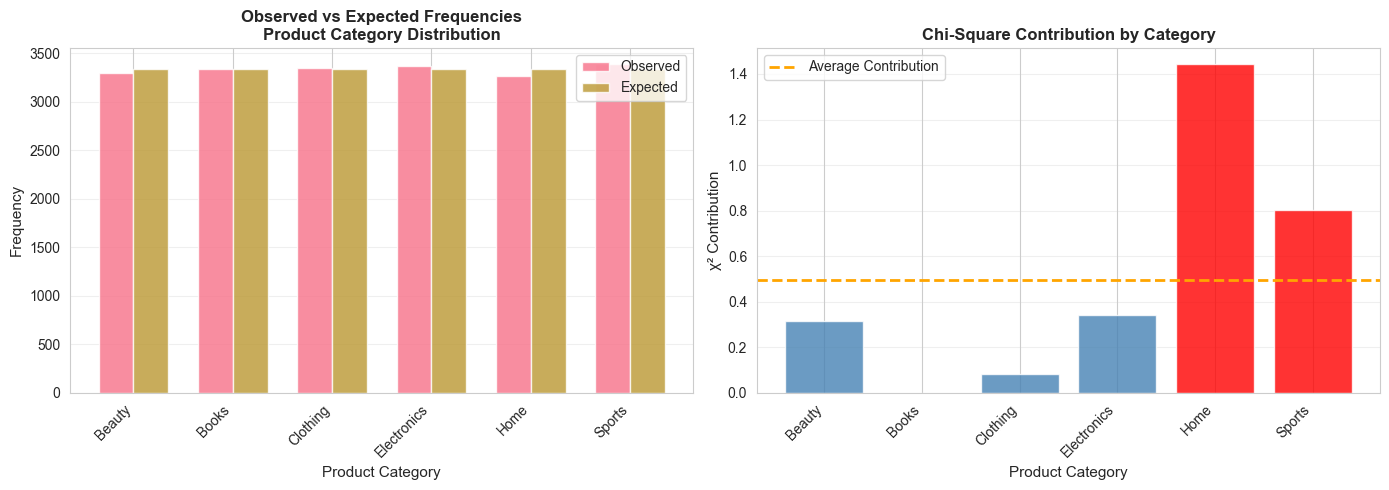

In [5]:
print("\n" + "="*70)
print("TEST 1B: GOODNESS-OF-FIT - PRODUCT CATEGORY DISTRIBUTION")
print("="*70)

# Hypothesis Formulation
print("\nHYPOTHESIS FORMULATION:")
print("-" * 70)
print("H₀: Product categories are equally distributed across all categories")
print("H₁: Product categories are NOT equally distributed")
print("\nSignificance Level: α = 0.05")

# Observed frequencies
observed_category = df['Product_Category'].value_counts().sort_index()
num_categories = len(observed_category)

print(f"\nOBSERVED FREQUENCIES:")
for cat, count in observed_category.items():
    print(f"  {cat}: {count}")

# Expected frequencies (uniform distribution)
expected_category = np.array([total_n / num_categories] * num_categories)

print(f"\nEXPECTED FREQUENCIES (H₀: Equal distribution):")
for i, cat in enumerate(observed_category.index):
    print(f"  {cat}: {expected_category[i]:.2f}")

# Chi-square test
chi2_stat_cat, p_value_cat = chisquare(observed_category, expected_category)

print(f"\n" + "-"*70)
print("CHI-SQUARE TEST RESULTS:")
print("-"*70)
print(f"Chi-Square Statistic (χ²): {chi2_stat_cat:.4f}")
print(f"P-value:                   {p_value_cat:.6f}")
print(f"Degrees of Freedom:        {num_categories - 1}")
print(f"Significance Level (α):    0.0500")

# Interpretation
print(f"\n" + "-"*70)
print("INTERPRETATION:")
print("-"*70)

if p_value_cat > 0.05:
    print(f"✓ FAIL TO REJECT H₀ (p = {p_value_cat:.6f} > 0.05)")
    print("\nConclusion: Product categories ARE equally distributed")
else:
    print(f"✗ REJECT H₀ (p = {p_value_cat:.6f} ≤ 0.05)")
    print("\nConclusion: Product categories are NOT equally distributed")

# Effect size
cramer_v_cat = np.sqrt(chi2_stat_cat / (total_n * (num_categories - 1)))
print(f"\nEffect Size (Cramér's V): {cramer_v_cat:.4f}")

# Detailed breakdown
contingency_cat = pd.DataFrame({
    'Category': observed_category.index,
    'Observed': observed_category.values,
    'Expected': expected_category.astype(int),
    'Difference': observed_category.values - expected_category.astype(int),
    'Chi2 Component': (observed_category.values - expected_category)**2 / expected_category
})

print(f"\nDETAILED BREAKDOWN:")
display(contingency_cat)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot: Observed vs Expected
ax1 = axes[0]
x_pos = np.arange(len(observed_category))
width = 0.35

ax1.bar(x_pos - width/2, observed_category.values, width, label='Observed', alpha=0.8)
ax1.bar(x_pos + width/2, expected_category, width, label='Expected', alpha=0.8)

ax1.set_xlabel('Product Category', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Observed vs Expected Frequencies\nProduct Category Distribution', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(observed_category.index, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Chi-square contribution
ax2 = axes[1]
chi2_contrib = (observed_category.values - expected_category)**2 / expected_category
colors = ['red' if x > chi2_stat_cat/num_categories else 'steelblue' for x in chi2_contrib]

ax2.bar(observed_category.index, chi2_contrib, color=colors, alpha=0.8)
ax2.axhline(y=chi2_stat_cat/num_categories, color='orange', linestyle='--', linewidth=2, label='Average Contribution')
ax2.set_xlabel('Product Category', fontsize=11)
ax2.set_ylabel('χ² Contribution', fontsize=11)
ax2.set_title('Chi-Square Contribution by Category', fontsize=12, fontweight='bold')
ax2.set_xticklabels(observed_category.index, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*70)

---
# TEST 2: CHI-SQUARE TEST OF INDEPENDENCE

## Hypothesis Testing Framework

**Purpose**: Test if two categorical variables are associated or independent

**H₀ (Null Hypothesis)**: The two variables are INDEPENDENT (no association)

**H₁ (Alternative Hypothesis)**: The two variables are DEPENDENT (associated)

**Test Statistic**: χ² = Σ [(Observed - Expected)² / Expected]

**Decision Rule**: 
- If p-value > α (0.05) → FAIL TO REJECT H₀ (independent)
- If p-value ≤ α (0.05) → REJECT H₀ (dependent/associated)

### Test 2A: Loyalty Status vs Product Category


TEST 2A: CHI-SQUARE INDEPENDENCE TEST
Loyalty Status × Product Category

HYPOTHESIS FORMULATION:
----------------------------------------------------------------------
H₀: Loyalty Status and Product Category are INDEPENDENT
     (Product preference does NOT differ by loyalty status)

H₁: Loyalty Status and Product Category are DEPENDENT/ASSOCIATED
     (Product preference DOES differ by loyalty status)

Significance Level: α = 0.05

CONTINGENCY TABLE (Observed Frequencies):


Product_Category,Beauty,Books,Clothing,Electronics,Home,Sports
Loyalty_Member,,,,,,
No,1645,1630,1683,1681,1622,1664
Yes,1656,1703,1667,1686,1642,1721



----------------------------------------------------------------------
CHI-SQUARE TEST RESULTS:
----------------------------------------------------------------------
Chi-Square Statistic (χ²): 1.6768
P-value:                   0.891806
Degrees of Freedom:        5
Significance Level (α):    0.0500
Sample Size (n):           20,000

----------------------------------------------------------------------
INTERPRETATION:
----------------------------------------------------------------------
✓ FAIL TO REJECT H₀ (p = 0.891806 > 0.05)

Conclusion: Loyalty Status and Product Category are INDEPENDENT
            Product preference does NOT differ by loyalty status

Effect Size (Cramér's V): 0.0092
  → Negligible association

EXPECTED FREQUENCIES (Under H₀):


Product_Category,Beauty,Books,Clothing,Electronics,Home,Sports
Loyalty_Member,,,,,,
No,"1,638.1200","1,654.0000","1,662.4400","1,670.8700","1,619.7600","1,679.8100"
Yes,"1,662.8800","1,679.0000","1,687.5600","1,696.1300","1,644.2400","1,705.1900"



CHI-SQUARE CONTRIBUTION BY CELL:


Product_Category,Beauty,Books,Clothing,Electronics,Home,Sports
Loyalty_Member,,,,,,
No,0.0289,0.3483,0.2543,0.0614,0.0031,0.1487
Yes,0.0285,0.3431,0.2505,0.0605,0.0031,0.1465



Key Insights:
  • Largest contributor: ('Books', 'No') = 0.3483
  • Total χ²: 1.6768


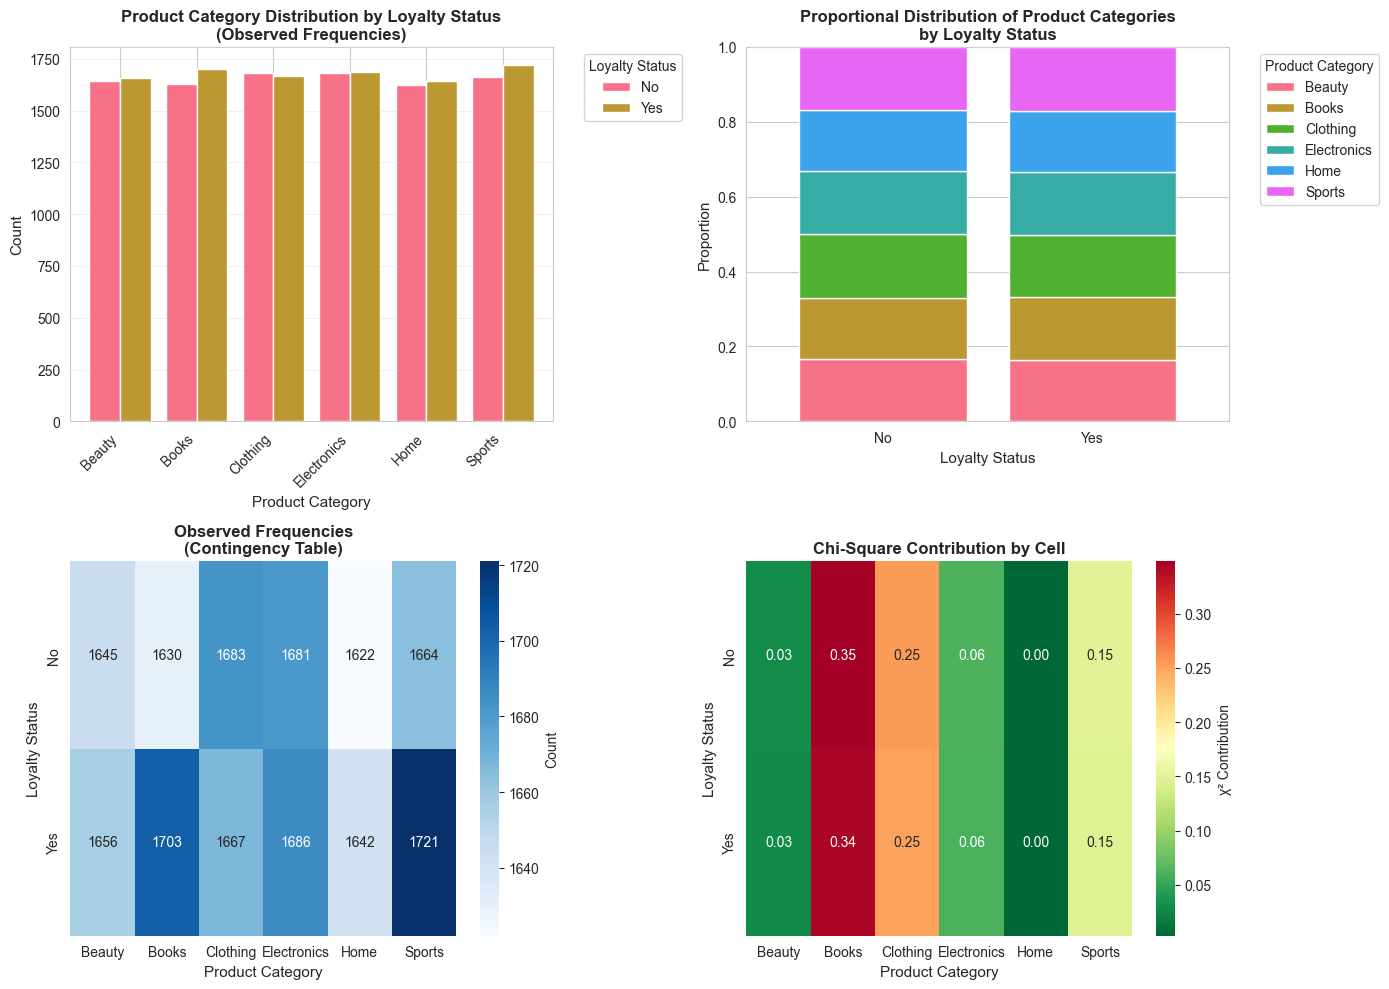

In [6]:
print("\n" + "="*70)
print("TEST 2A: CHI-SQUARE INDEPENDENCE TEST")
print("Loyalty Status × Product Category")
print("="*70)

# Hypothesis Formulation
print("\nHYPOTHESIS FORMULATION:")
print("-" * 70)
print("H₀: Loyalty Status and Product Category are INDEPENDENT")
print("     (Product preference does NOT differ by loyalty status)")
print("\nH₁: Loyalty Status and Product Category are DEPENDENT/ASSOCIATED")
print("     (Product preference DOES differ by loyalty status)")
print("\nSignificance Level: α = 0.05")

# Create contingency table
contingency_table = pd.crosstab(df['Loyalty_Member'], df['Product_Category'])

print(f"\nCONTINGENCY TABLE (Observed Frequencies):")
display(contingency_table)

# Chi-square test of independence
chi2_stat_test2a, p_value_test2a, dof_test2a, expected_freq_test2a = chi2_contingency(contingency_table)

print(f"\n" + "-"*70)
print("CHI-SQUARE TEST RESULTS:")
print("-"*70)
print(f"Chi-Square Statistic (χ²): {chi2_stat_test2a:.4f}")
print(f"P-value:                   {p_value_test2a:.6f}")
print(f"Degrees of Freedom:        {dof_test2a}")
print(f"Significance Level (α):    0.0500")
print(f"Sample Size (n):           {df.shape[0]:,}")

# Interpretation
print(f"\n" + "-"*70)
print("INTERPRETATION:")
print("-"*70)

if p_value_test2a > 0.05:
    print(f"✓ FAIL TO REJECT H₀ (p = {p_value_test2a:.6f} > 0.05)")
    print("\nConclusion: Loyalty Status and Product Category are INDEPENDENT")
    print("            Product preference does NOT differ by loyalty status")
else:
    print(f"✗ REJECT H₀ (p = {p_value_test2a:.6f} ≤ 0.05)")
    print("\nConclusion: Loyalty Status and Product Category are ASSOCIATED")
    print("            Product preference DOES differ by loyalty status")

# Effect size (Cramér's V)
min_dim = min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
cramer_v_test2a = np.sqrt(chi2_stat_test2a / (total_n * min_dim))

print(f"\nEffect Size (Cramér's V): {cramer_v_test2a:.4f}")
if cramer_v_test2a < 0.10:
    print("  → Negligible association")
elif cramer_v_test2a < 0.20:
    print("  → Weak association")
elif cramer_v_test2a < 0.40:
    print("  → Moderate association")
else:
    print("  → Strong association")

# Expected frequencies table
expected_df_test2a = pd.DataFrame(
    expected_freq_test2a,
    index=contingency_table.index,
    columns=contingency_table.columns
)

print(f"\nEXPECTED FREQUENCIES (Under H₀):")
display(expected_df_test2a.round(2))

# Chi-square contribution
chi2_contrib = (contingency_table.values - expected_freq_test2a)**2 / expected_freq_test2a
chi2_contrib_df = pd.DataFrame(
    chi2_contrib,
    index=contingency_table.index,
    columns=contingency_table.columns
)

print(f"\nCHI-SQUARE CONTRIBUTION BY CELL:")
display(chi2_contrib_df.round(4))

print(f"\nKey Insights:")
print(f"  • Largest contributor: {chi2_contrib_df.unstack().idxmax()} = {chi2_contrib_df.unstack().max():.4f}")
print(f"  • Total χ²: {chi2_contrib_df.unstack().sum():.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Stacked bar chart
ax1 = axes[0, 0]
contingency_table.T.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Product Category Distribution by Loyalty Status\n(Observed Frequencies)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Product Category', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.legend(title='Loyalty Status', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3, axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Proportional stacked bar
ax2 = axes[0, 1]
contingency_prop = contingency_table.div(contingency_table.sum(axis=1), axis=0)
contingency_prop.plot(kind='bar', stacked=True, ax=ax2, width=0.8)
ax2.set_title('Proportional Distribution of Product Categories\nby Loyalty Status', fontsize=12, fontweight='bold')
ax2.set_xlabel('Loyalty Status', fontsize=11)
ax2.set_ylabel('Proportion', fontsize=11)
ax2.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_ylim([0, 1])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)

# Heatmap: Observed
ax3 = axes[1, 0]
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=ax3, cbar_kws={'label': 'Count'})
ax3.set_title('Observed Frequencies\n(Contingency Table)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Product Category', fontsize=11)
ax3.set_ylabel('Loyalty Status', fontsize=11)

# Heatmap: Chi-square contribution
ax4 = axes[1, 1]
sns.heatmap(chi2_contrib_df, annot=True, fmt='.2f', cmap='RdYlGn_r', ax=ax4, cbar_kws={'label': 'χ² Contribution'})
ax4.set_title('Chi-Square Contribution by Cell', fontsize=12, fontweight='bold')
ax4.set_xlabel('Product Category', fontsize=11)
ax4.set_ylabel('Loyalty Status', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*70)

### Test 2B: Gender vs Product Category


TEST 2B: CHI-SQUARE INDEPENDENCE TEST
Gender × Product Category

HYPOTHESIS FORMULATION:
----------------------------------------------------------------------
H₀: Gender and Product Category are INDEPENDENT
     (Product preference does NOT differ by gender)

H₁: Gender and Product Category are DEPENDENT/ASSOCIATED
     (Product preference DOES differ by gender)

Significance Level: α = 0.05

CONTINGENCY TABLE (Observed Frequencies):


Product_Category,Beauty,Books,Clothing,Electronics,Home,Sports
Gender,,,,,,
Female,1072,1077,1106,1110,1088,1147
Male,1153,1120,1116,1130,1063,1102
Other,1076,1136,1128,1127,1113,1136



----------------------------------------------------------------------
CHI-SQUARE TEST RESULTS:
----------------------------------------------------------------------
Chi-Square Statistic (χ²): 6.9326
P-value:                   0.731797
Degrees of Freedom:        10
Significance Level (α):    0.0500

----------------------------------------------------------------------
INTERPRETATION:
----------------------------------------------------------------------
✓ FAIL TO REJECT H₀ (p = 0.731797 > 0.05)

Conclusion: Gender and Product Category are INDEPENDENT

Effect Size (Cramér's V): 0.0132


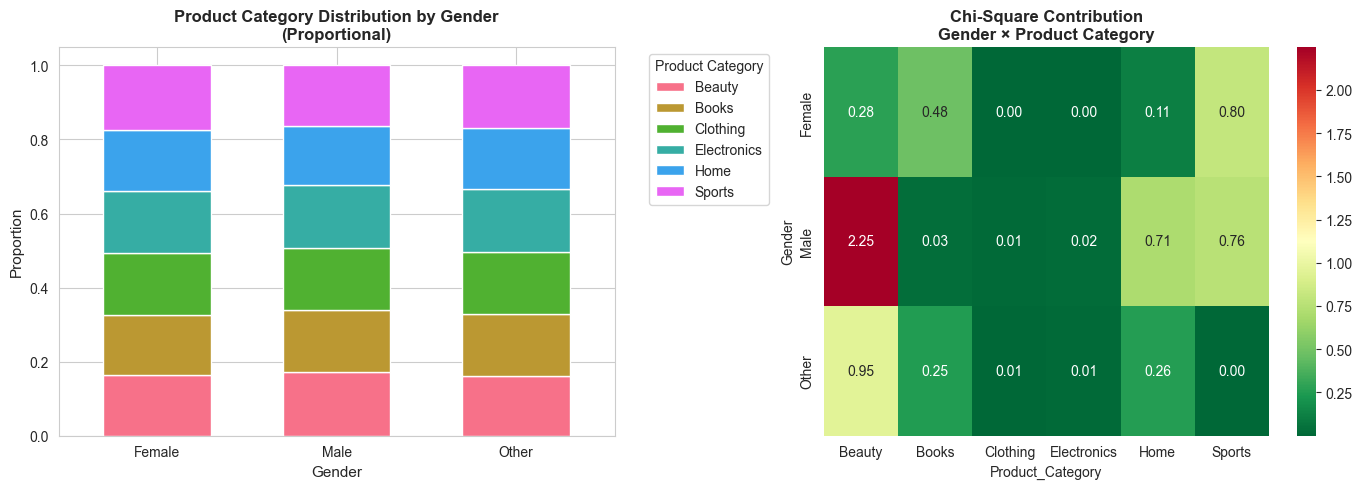

In [7]:
print("\n" + "="*70)
print("TEST 2B: CHI-SQUARE INDEPENDENCE TEST")
print("Gender × Product Category")
print("="*70)

# Hypothesis Formulation
print("\nHYPOTHESIS FORMULATION:")
print("-" * 70)
print("H₀: Gender and Product Category are INDEPENDENT")
print("     (Product preference does NOT differ by gender)")
print("\nH₁: Gender and Product Category are DEPENDENT/ASSOCIATED")
print("     (Product preference DOES differ by gender)")
print("\nSignificance Level: α = 0.05")

# Create contingency table
contingency_gender = pd.crosstab(df['Gender'], df['Product_Category'])

print(f"\nCONTINGENCY TABLE (Observed Frequencies):")
display(contingency_gender)

# Chi-square test
chi2_stat_test2b, p_value_test2b, dof_test2b, expected_freq_test2b = chi2_contingency(contingency_gender)

print(f"\n" + "-"*70)
print("CHI-SQUARE TEST RESULTS:")
print("-"*70)
print(f"Chi-Square Statistic (χ²): {chi2_stat_test2b:.4f}")
print(f"P-value:                   {p_value_test2b:.6f}")
print(f"Degrees of Freedom:        {dof_test2b}")
print(f"Significance Level (α):    0.0500")

# Interpretation
print(f"\n" + "-"*70)
print("INTERPRETATION:")
print("-"*70)

if p_value_test2b > 0.05:
    print(f"✓ FAIL TO REJECT H₀ (p = {p_value_test2b:.6f} > 0.05)")
    print("\nConclusion: Gender and Product Category are INDEPENDENT")
else:
    print(f"✗ REJECT H₀ (p = {p_value_test2b:.6f} ≤ 0.05)")
    print("\nConclusion: Gender and Product Category are ASSOCIATED")

# Effect size
min_dim_gb = min(contingency_gender.shape[0] - 1, contingency_gender.shape[1] - 1)
cramer_v_test2b = np.sqrt(chi2_stat_test2b / (total_n * min_dim_gb))

print(f"\nEffect Size (Cramér's V): {cramer_v_test2b:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar
ax1 = axes[0]
contingency_gender_prop = contingency_gender.div(contingency_gender.sum(axis=1), axis=0)
contingency_gender_prop.plot(kind='bar', stacked=True, ax=ax1, width=0.6)
ax1.set_title('Product Category Distribution by Gender\n(Proportional)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=11)
ax1.set_ylabel('Proportion', fontsize=11)
ax1.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)

# Heatmap
ax2 = axes[1]
chi2_contrib_gb = (contingency_gender.values - expected_freq_test2b)**2 / expected_freq_test2b
chi2_contrib_gb_df = pd.DataFrame(
    chi2_contrib_gb,
    index=contingency_gender.index,
    columns=contingency_gender.columns
)
sns.heatmap(chi2_contrib_gb_df, annot=True, fmt='.2f', cmap='RdYlGn_r', ax=ax2)
ax2.set_title('Chi-Square Contribution\nGender × Product Category', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)

### Test 2C: Payment Method vs Loyalty Status


TEST 2C: CHI-SQUARE INDEPENDENCE TEST
Payment Method × Loyalty Status

HYPOTHESIS FORMULATION:
----------------------------------------------------------------------
H₀: Payment Method and Loyalty Status are INDEPENDENT
     (Payment method preference does NOT differ by loyalty status)

H₁: Payment Method and Loyalty Status are DEPENDENT/ASSOCIATED
     (Payment method preference DOES differ by loyalty status)

Significance Level: α = 0.05

CONTINGENCY TABLE (Observed Frequencies):


Loyalty_Member,No,Yes
Payment_Method,,
Bank Transfer,2556,2558
Credit Card,2491,2483
Debit Card,2399,2463
PayPal,2479,2571



----------------------------------------------------------------------
CHI-SQUARE TEST RESULTS:
----------------------------------------------------------------------
Chi-Square Statistic (χ²): 1.4072
P-value:                   0.703843
Degrees of Freedom:        3
Significance Level (α):    0.0500

----------------------------------------------------------------------
INTERPRETATION:
----------------------------------------------------------------------
✓ FAIL TO REJECT H₀ (p = 0.703843 > 0.05)

Conclusion: Payment Method and Loyalty Status are INDEPENDENT

Effect Size (Cramér's V): 0.0084


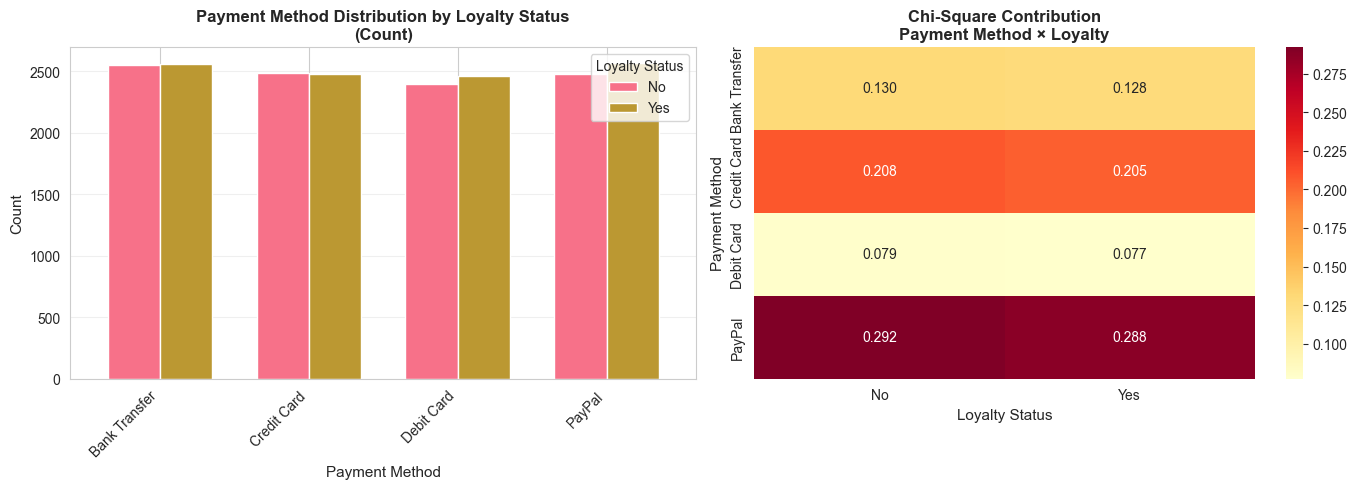

In [8]:
print("\n" + "="*70)
print("TEST 2C: CHI-SQUARE INDEPENDENCE TEST")
print("Payment Method × Loyalty Status")
print("="*70)

# Hypothesis Formulation
print("\nHYPOTHESIS FORMULATION:")
print("-" * 70)
print("H₀: Payment Method and Loyalty Status are INDEPENDENT")
print("     (Payment method preference does NOT differ by loyalty status)")
print("\nH₁: Payment Method and Loyalty Status are DEPENDENT/ASSOCIATED")
print("     (Payment method preference DOES differ by loyalty status)")
print("\nSignificance Level: α = 0.05")

# Create contingency table
contingency_payment = pd.crosstab(df['Payment_Method'], df['Loyalty_Member'])

print(f"\nCONTINGENCY TABLE (Observed Frequencies):")
display(contingency_payment)

# Chi-square test
chi2_stat_test2c, p_value_test2c, dof_test2c, expected_freq_test2c = chi2_contingency(contingency_payment)

print(f"\n" + "-"*70)
print("CHI-SQUARE TEST RESULTS:")
print("-"*70)
print(f"Chi-Square Statistic (χ²): {chi2_stat_test2c:.4f}")
print(f"P-value:                   {p_value_test2c:.6f}")
print(f"Degrees of Freedom:        {dof_test2c}")
print(f"Significance Level (α):    0.0500")

# Interpretation
print(f"\n" + "-"*70)
print("INTERPRETATION:")
print("-"*70)

if p_value_test2c > 0.05:
    print(f"✓ FAIL TO REJECT H₀ (p = {p_value_test2c:.6f} > 0.05)")
    print("\nConclusion: Payment Method and Loyalty Status are INDEPENDENT")
else:
    print(f"✗ REJECT H₀ (p = {p_value_test2c:.6f} ≤ 0.05)")
    print("\nConclusion: Payment Method and Loyalty Status are ASSOCIATED")

# Effect size
min_dim_pm = min(contingency_payment.shape[0] - 1, contingency_payment.shape[1] - 1)
cramer_v_test2c = np.sqrt(chi2_stat_test2c / (total_n * min_dim_pm))

print(f"\nEffect Size (Cramér's V): {cramer_v_test2c:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grouped bar chart
ax1 = axes[0]
contingency_payment.plot(kind='bar', ax=ax1, width=0.7)
ax1.set_title('Payment Method Distribution by Loyalty Status\n(Count)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Payment Method', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.legend(title='Loyalty Status')
ax1.grid(True, alpha=0.3, axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Heatmap: Chi-square contribution
ax2 = axes[1]
chi2_contrib_pm = (contingency_payment.values - expected_freq_test2c)**2 / expected_freq_test2c
chi2_contrib_pm_df = pd.DataFrame(
    chi2_contrib_pm,
    index=contingency_payment.index,
    columns=contingency_payment.columns
)
sns.heatmap(chi2_contrib_pm_df, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax2)
ax2.set_title('Chi-Square Contribution\nPayment Method × Loyalty', fontsize=12, fontweight='bold')
ax2.set_xlabel('Loyalty Status', fontsize=11)
ax2.set_ylabel('Payment Method', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*70)

---
# EFFECT SIZE AND ASSOCIATION STRENGTH


EFFECT SIZE ANALYSIS: CRAMÉR'S V

Effect Size Interpretation:
----------------------------------------------------------------------
Cramér's V measures the strength of association between categorical variables

Interpretation Guidelines:
  • 0.00 - 0.10: Negligible association
  • 0.10 - 0.20: Weak association
  • 0.20 - 0.40: Moderate association
  • 0.40 - 0.60: Relatively strong association
  • 0.60+:       Strong association

SUMMARY OF ALL CHI-SQUARE TESTS:


,Test,χ² Statistic,P-value,Cramér's V,Association,Conclusion
0,Loyalty Status × Product Category,1.6768,0.8918,0.0092,Negligible,✓ Independent
1,Gender × Product Category,6.9326,0.7318,0.0132,Negligible,✓ Independent
2,Payment Method × Loyalty Status,1.4072,0.7038,0.0084,Negligible,✓ Independent


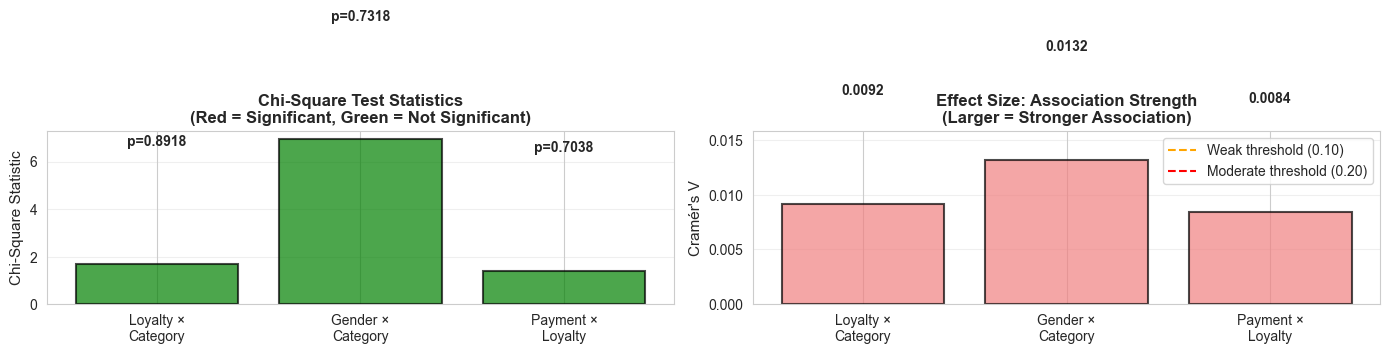

In [9]:
print("\n" + "="*70)
print("EFFECT SIZE ANALYSIS: CRAMÉR'S V")
print("="*70)

print("\nEffect Size Interpretation:")
print("-" * 70)
print("Cramér's V measures the strength of association between categorical variables")
print("\nInterpretation Guidelines:")
print("  • 0.00 - 0.10: Negligible association")
print("  • 0.10 - 0.20: Weak association")
print("  • 0.20 - 0.40: Moderate association")
print("  • 0.40 - 0.60: Relatively strong association")
print("  • 0.60+:       Strong association")

# Summary table
effect_sizes = pd.DataFrame({
    'Test': [
        'Loyalty Status × Product Category',
        'Gender × Product Category',
        'Payment Method × Loyalty Status'
    ],
    'χ² Statistic': [chi2_stat_test2a, chi2_stat_test2b, chi2_stat_test2c],
    'P-value': [p_value_test2a, p_value_test2b, p_value_test2c],
    'Cramér\'s V': [cramer_v_test2a, cramer_v_test2b, cramer_v_test2c],
    'Association': [
        'Negligible' if cramer_v_test2a < 0.10 else ('Weak' if cramer_v_test2a < 0.20 else 'Moderate'),
        'Negligible' if cramer_v_test2b < 0.10 else ('Weak' if cramer_v_test2b < 0.20 else 'Moderate'),
        'Negligible' if cramer_v_test2c < 0.10 else ('Weak' if cramer_v_test2c < 0.20 else 'Moderate')
    ],
    'Conclusion': [
        '✓ Independent' if p_value_test2a > 0.05 else '✗ Associated',
        '✓ Independent' if p_value_test2b > 0.05 else '✗ Associated',
        '✓ Independent' if p_value_test2c > 0.05 else '✗ Associated'
    ]
})

print("\nSUMMARY OF ALL CHI-SQUARE TESTS:")
display(effect_sizes)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot: Chi-square statistics
ax1 = axes[0]
tests = ['Loyalty ×\nCategory', 'Gender ×\nCategory', 'Payment ×\nLoyalty']
chi2_values = [chi2_stat_test2a, chi2_stat_test2b, chi2_stat_test2c]
colors_chi = ['green' if p > 0.05 else 'red' for p in [p_value_test2a, p_value_test2b, p_value_test2c]]

ax1.bar(tests, chi2_values, color=colors_chi, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Chi-Square Statistic', fontsize=11)
ax1.set_title('Chi-Square Test Statistics\n(Red = Significant, Green = Not Significant)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

for i, (test, val, p) in enumerate(zip(tests, chi2_values, [p_value_test2a, p_value_test2b, p_value_test2c])):
    ax1.text(i, val + 5, f'p={p:.4f}', ha='center', fontsize=10, fontweight='bold')

# Bar plot: Cramér's V
ax2 = axes[1]
cramer_values = [cramer_v_test2a, cramer_v_test2b, cramer_v_test2c]
colors_v = ['lightcoral' if v < 0.10 else 'gold' if v < 0.20 else 'lightsalmon' for v in cramer_values]

ax2.bar(tests, cramer_values, color=colors_v, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.axhline(y=0.10, color='orange', linestyle='--', linewidth=1.5, label='Weak threshold (0.10)')
ax2.axhline(y=0.20, color='red', linestyle='--', linewidth=1.5, label='Moderate threshold (0.20)')
ax2.set_ylabel('Cramér\'s V', fontsize=11)
ax2.set_title('Effect Size: Association Strength\n(Larger = Stronger Association)', fontsize=12, fontweight='bold')
ax2.set_ylim([0, max(cramer_values) * 1.2])
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

for i, (test, val) in enumerate(zip(tests, cramer_values)):
    ax2.text(i, val + 0.01, f'{val:.4f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)

---
# COMPREHENSIVE SUMMARY AND CONCLUSIONS

In [10]:
print("\n" + "="*80)
print("CHI-SQUARED ANALYSIS: COMPREHENSIVE SUMMARY AND CONCLUSIONS")
print("="*80)

print("\n" + "-"*80)
print("1. GOODNESS-OF-FIT TESTS")
print("-"*80)

print("\nTest 1A: Loyalty Member Distribution")
print(f"  Result: χ² = {chi2_stat:.4f}, p = {p_value:.6f}")
if p_value > 0.05:
    print(f"  Conclusion: ✓ Loyalty membership IS equally distributed (50-50)")
else:
    print(f"  Conclusion: ✗ Loyalty membership is NOT equally distributed")
    
print("\nTest 1B: Product Category Distribution")
print(f"  Result: χ² = {chi2_stat_cat:.4f}, p = {p_value_cat:.6f}")
if p_value_cat > 0.05:
    print(f"  Conclusion: ✓ Product categories ARE equally distributed")
else:
    print(f"  Conclusion: ✗ Product categories are NOT equally distributed")
    most_common = df['Product_Category'].value_counts().index[0]
    least_common = df['Product_Category'].value_counts().index[-1]
    print(f"             Most common: {most_common}")
    print(f"             Least common: {least_common}")

print("\n" + "-"*80)
print("2. INDEPENDENCE TESTS")
print("-"*80)

print("\nTest 2A: Loyalty Status × Product Category")
print(f"  Result: χ² = {chi2_stat_test2a:.4f}, p = {p_value_test2a:.6f}, Cramér's V = {cramer_v_test2a:.4f}")
if p_value_test2a > 0.05:
    print(f"  Conclusion: ✓ Variables are INDEPENDENT")
    print(f"             Product preference does NOT differ by loyalty status")
else:
    print(f"  Conclusion: ✗ Variables are ASSOCIATED")
    print(f"             Product preference DOES differ by loyalty status")
    print(f"             Effect size: {cramer_v_test2a:.4f} ({['Negligible', 'Weak', 'Moderate'][min(2, int(cramer_v_test2a*10))]})")

print("\nTest 2B: Gender × Product Category")
print(f"  Result: χ² = {chi2_stat_test2b:.4f}, p = {p_value_test2b:.6f}, Cramér's V = {cramer_v_test2b:.4f}")
if p_value_test2b > 0.05:
    print(f"  Conclusion: ✓ Variables are INDEPENDENT")
    print(f"             Product preference does NOT differ by gender")
else:
    print(f"  Conclusion: ✗ Variables are ASSOCIATED")
    print(f"             Product preference DOES differ by gender")

print("\nTest 2C: Payment Method × Loyalty Status")
print(f"  Result: χ² = {chi2_stat_test2c:.4f}, p = {p_value_test2c:.6f}, Cramér's V = {cramer_v_test2c:.4f}")
if p_value_test2c > 0.05:
    print(f"  Conclusion: ✓ Variables are INDEPENDENT")
    print(f"             Payment method preference does NOT differ by loyalty status")
else:
    print(f"  Conclusion: ✗ Variables are ASSOCIATED")
    print(f"             Payment method preference DOES differ by loyalty status")

print("\n" + "="*80)
print("3. PRACTICAL IMPLICATIONS")
print("="*80)

print("\n• Marketing Strategy:")
if p_value_test2a <= 0.05:
    print("  - Different products appeal to loyal vs non-loyal customers")
    print("  - Tailor product recommendations by loyalty status")
else:
    print("  - No difference in product preference by loyalty status")

if p_value_test2b <= 0.05:
    print("  - Gender-based product preferences exist")
    print("  - Consider gender-specific marketing campaigns")
else:
    print("  - No gender-based product preferences")

print("\n• Payment Methods:")
if p_value_test2c <= 0.05:
    print("  - Loyal and non-loyal customers prefer different payment methods")
    print("  - Optimize payment options by customer segment")
else:
    print("  - No difference in payment preferences by loyalty status")

print("\n" + "="*80)
print("4. ASSUMPTIONS AND LIMITATIONS")
print("="*80)

print("\nChi-Square Test Assumptions:")
print("  ✓ Categorical/nominal data: Used correctly")
print("  ✓ Independence: Observations are unique customer transactions")
print("  ✓ Expected frequencies: All cells should have E ≥ 5")

# Check expected frequencies
min_expected_2a = expected_freq_test2a.min()
min_expected_2b = expected_freq_test2b.min()
min_expected_2c = expected_freq_test2c.min()

print(f"\nExpected Frequency Check:")
print(f"  Test 2A minimum expected: {min_expected_2a:.2f} {'✓ OK' if min_expected_2a >= 5 else '⚠ Low'}")
print(f"  Test 2B minimum expected: {min_expected_2b:.2f} {'✓ OK' if min_expected_2b >= 5 else '⚠ Low'}")
print(f"  Test 2C minimum expected: {min_expected_2c:.2f} {'✓ OK' if min_expected_2c >= 5 else '⚠ Low'}")

print("\n" + "="*80)
print("\n✓ CHI-SQUARED ANALYSIS COMPLETE")
print("\n" + "="*80)


CHI-SQUARED ANALYSIS: COMPREHENSIVE SUMMARY AND CONCLUSIONS

--------------------------------------------------------------------------------
1. GOODNESS-OF-FIT TESTS
--------------------------------------------------------------------------------

Test 1A: Loyalty Member Distribution
  Result: χ² = 1.1250, p = 0.288844
  Conclusion: ✓ Loyalty membership IS equally distributed (50-50)

Test 1B: Product Category Distribution
  Result: χ² = 2.9800, p = 0.703069
  Conclusion: ✓ Product categories ARE equally distributed

--------------------------------------------------------------------------------
2. INDEPENDENCE TESTS
--------------------------------------------------------------------------------

Test 2A: Loyalty Status × Product Category
  Result: χ² = 1.6768, p = 0.891806, Cramér's V = 0.0092
  Conclusion: ✓ Variables are INDEPENDENT
             Product preference does NOT differ by loyalty status

Test 2B: Gender × Product Category
  Result: χ² = 6.9326, p = 0.731797, Cramér's 